# 1. auto-mpg.csv 파일을 이용하여 회귀 분석

## 1-1. 필요한 모듈 import

In [12]:
import pandas as pd
import numpy as np

In [14]:
#경고 알림 무시
import warnings
warnings.filterwarnings(action='ignore')

## 1-2. csv import

In [16]:
auto_df = pd.read_csv('0920_auto-mpg.csv')
print(auto_df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [347]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- mpg: 연비 (miles per gallon), 자동차가 1갤런의 연료로 주행할 수 있는 마일 수를 나타냅니다. 이 값이 높을수록 연료 효율이 좋습니다.
- cylinders: 실린더 수, 엔진의 실린더 개수를 나타냅니다. 보통 실린더 수가 많을수록 출력이 높지만 연비는 낮을 수 있습니다.
- displacement: 배기량 (cubic inches 또는 liters), 엔진의 전체 배기량을 나타내며, 보통 더 큰 배기량은 더 많은 출력과 토크를 제공합니다.
- horsepower: 마력, 엔진의 출력 능력을 나타냅니다. 높은 마력은 차량의 성능이 좋음을 의미합니다.
- weight: 차량 무게 (pounds), 차량의 총 중량을 나타냅니다. 무게가 가벼울수록 연비가 좋고 성능이 개선될 수 있습니다.
- acceleration: 가속 성능 (0-60 mph 시간), 차량이 정지 상태에서 60mph에 도달하는 데 걸리는 시간을 나타냅니다. 낮은 값이 더 좋은 가속 성능을 의미합니다.
- model_year: 모델 연도, 차량이 제조된 연도를 나타냅니다.
- origin: 차량의 원산지, 일반적으로 제조국가를 나타냅니다. 예를 들어, 1은 미국, 2는 유럽, 3은 일본 등을 의미할 수 있습니다.
- car_name: 차량 이름, 특정 모델의 명칭을 나타냅니다.

## 1-3 결측값을 처리하기
0. 결측값을 찾기
1. 결측값을 제거하기
2. 결측값을 (실린더 별)평균값으로 넣기

In [305]:
# '?'를 결측값으로 간주하고 개수를 세기
hp_nan = (auto_df['horsepower'] == '?').sum()
# count()는 결측값을 포함하지 않는 실제 값의 개수를 반환해서 원하는 방식으로 사용 x
#'?' 값을 세기 위해서는 조건을 걸어 sum()을 사용하는 것이 일반적

print(f"horsepower 열의 '?' 결측값 개수: {hp_nan}")

horsepower 열의 '?' 결측값 개수: 6


### 1-3-1 결측값 제거하기

In [228]:
# '?' 로 작성된 결측값을 null로 바꾸기
auto_df['horsepower'] = auto_df['horsepower'].replace('?', pd.NA)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [230]:
# 결측값 제거하기
auto_df.dropna(subset=['horsepower'],axis=0,inplace=True)
# dropna(): 결측값(NaN)이 포함된 행이나 열을 삭제합니다.
# subset=['horsepower']: horsepower 열에 결측값이 있는 행만 삭제하겠다는 의미
# axis=0: 행을 기준으로 삭제하겠다는 의미입니다. axis=0은 행을, axis=1은 열을 의미
# inplace=True: 원래 데이터프레임을 직접 수정하겠다는 의미
# inplace=False일 경우, 수정된 데이터프레임을 반환할 뿐 원래 데이터는 그대로 유지

auto_df['horsepower'] = auto_df['horsepower'].astype(float)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### 1-3-2 결측값 대체하기

#### 1-3-2-1 : np.nan

In [311]:
# 실린더별 데이터의 개수
auto_df.cylinders.value_counts().sort_index()

cylinders
3      4
4    204
5      3
6     84
8    103
Name: count, dtype: int64

In [18]:
auto_df['horsepower'] = auto_df['horsepower'].replace('?', np.nan).astype(float)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [20]:
auto_df.groupby('cylinders')['horsepower'].count()

cylinders
3      4
4    199
5      3
6     83
8    103
Name: horsepower, dtype: int64

In [22]:
# horsepower의 결측값을 horsepower의 중앙값으로 대체하기
# auto_df['horsepower'] = auto_df['horsepower'].fillna(auto_df['horsepower'].median())

# 실린더별 horsepower의 평균값 계산하기
hp_mean = auto_df.groupby('cylinders')['horsepower'].mean()
print("실린더 별 horsepower의 평균값")
print(hp_mean)

실린더 별 horsepower의 평균값
cylinders
3     99.250000
4     78.281407
5     82.333333
6    101.506024
8    158.300971
Name: horsepower, dtype: float64


In [24]:
# horsepower의 결측값을 실린더별 horsepower의 평균값으로 대체하기
auto_df['horsepower'] = auto_df.apply(
    lambda row: hp_mean[row['cylinders']] if pd.isna(row['horsepower']) else row['horsepower'], axis=1
)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#### 1-3-2-2 : pd.NA

In [264]:
auto_df['horsepower'] = auto_df['horsepower'].replace('?', 0).astype(float)
# 'horsepower'의 Dtype이 'float'로 변경됨'
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [266]:
auto_df['horsepower'] = auto_df['horsepower'].replace(0, pd.NA)
# 'horsepower'의 Dtype이 'object'로 다시 변경됨'
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [268]:
# horsepower의 결측값을 horsepower의 중앙값으로 대체하기
# auto_df['horsepower'] = auto_df['horsepower'].fillna(auto_df['horsepower'].median())

# 실린더별 horsepower의 평균값 계산하기
hp_mean = auto_df.groupby('cylinders')['horsepower'].mean()
print("실린더 별 horsepower의 평균값")
print(hp_mean)

실린더 별 horsepower의 평균값
cylinders
3         99.25
4     78.281407
5     82.333333
6    101.506024
8    158.300971
Name: horsepower, dtype: object


In [270]:
# horsepower의 결측값을 실린더별 horsepower의 평균값으로 대체하기
auto_df['horsepower'] = auto_df.apply(
    lambda row: hp_mean[row['cylinders']] if pd.isna(row['horsepower']) else row['horsepower'], axis=1
)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#### 1-3-2-2 : pd.NA 주의사항

In [278]:
auto_df['horsepower'] = auto_df['horsepower'].replace('?', pd.NA).astype(float)
auto_df.info()

TypeError: float() argument must be a string or a real number, not 'NAType'

##### np.nan과 pd.NA의 차이점
1. 적용 대상 데이터 타입
    - np.nan: np.nan은 주로 부동 소수점(float) 자료형에서 결측값을 나타냅니다. 즉, 숫자형 데이터에만 적합하며, 정수형이나 문자열 데이터에서는 제대로 작동하지 않을 수 있습니다. 예를 들어, 정수형 데이터에 np.nan을 넣으면 자동으로 부동 소수점으로 변환됩니다.
    - pd.NA: pd.NA는 Pandas에서 모든 자료형(int, float, bool, object 등)을 포괄하는 **널값(null value)**을 나타냅니다. 따라서 숫자형뿐만 아니라 정수형, 문자열, 부울형 데이터에도 적용할 수 있습니다. 이는 Pandas의 새로운 기능으로, 모든 자료형에 걸쳐 일관된 결측값 처리를 가능하게 합니다.
    
2. 연산 동작
    - np.nan: np.nan이 포함된 연산은 대부분의 경우 **결과가 np.nan**이 됩니다. 예를 들어, 숫자형 배열에서 np.nan과의 덧셈을 수행하면 결과는 모두 np.nan이 됩니다.
    - pd.NA: pd.NA와의 연산도 결측값이 포함된 경우 대체로 **결과가 pd.NA**가 되지만, Pandas는 더 나은 결측값 처리 기능을 제공하여, 일부 연산에서는 결측값을 무시하거나 처리할 수 있는 방법을 제공합니다.
      
3. 자료형 유지
    - np.nan: np.nan을 사용하면 해당 열의 자료형이 자동으로 **부동 소수점(float)**으로 변경됩니다. 예를 들어, 정수형 배열에 np.nan을 넣으면 자료형이 float로 바뀝니다.
    - pd.NA: pd.NA는 정수형, 문자열형, 부울형 등의 자료형을 유지할 수 있습니다. 예를 들어, 정수형 배열에 pd.NA를 넣어도 자료형이 Int64로 유지됩니다.

4. 부울 연산
    - np.nan: np.nan을 포함한 부울 연산은 예상하기 어려운 결과를 낼 수 있습니다. 예를 들어, np.nan == np.nan은 False를 반환합니다.
    - pd.NA: pd.NA는 결측값이므로 명시적인 비교 연산에 대해 pd.NA를 반환하며, 부울 연산에서 결측값으로 처리됩니다.

5. Pandas의 결측값 처리
- np.nan: Pandas의 결측값 처리 함수(dropna, fillna 등)에서도 여전히 잘 작동하지만, np.nan은 주로 부동 소수점 값으로 처리되기 때문에 정수형, 부울형에서는 한계가 있을 수 있습니다.
- pd.NA: Pandas의 결측값 처리 함수에서 모든 자료형에 걸쳐 일관되게 동작하며, 더 나은 결측값 처리 기능을 제공합니다.

##### 요약
- np.nan: 주로 부동 소수점 자료형에서 결측값을 나타냅니다. 연산에서 결측값 전파 및 부동 소수점 변환이 기본적으로 이루어집니다.
- pd.NA: Pandas에서 모든 자료형에 걸쳐 사용할 수 있는 결측값입니다. 일관된 결측값 처리를 제공하며, 자료형 변환 없이 다양한 연산에 대응할 수 있습니다.

따라서 pd.NA는 더 최근에 도입된 결측값 처리 방식이며, 다양한 자료형에 대해 결측값을 더 유연하고 일관되게 다룰 수 있다는 장점이 있습니다.

##### pd.NA는 본래의 자료형 'object'를 유지한다.

## 1-4 데이터 분석하기

In [29]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.132947,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.310886,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:
#제조국 별 개수 확인하기
auto_df.origin.value_counts().sort_index()

origin
1    249
2     70
3     79
Name: count, dtype: int64

In [33]:
Rformula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin'

In [35]:
#회귀시 사용
from statsmodels.formula.api import ols, glm

# 선형 회귀 모델 중 OLS(ordinary least squares) 모델 사용
regression_result = ols(Rformula, data = auto_df).fit()
#선형 회귀 관련 통계값 확인
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.97e-141
Time:                        14:44:12   Log-Likelihood:                -1040.2
No. Observations:                 398   AIC:                             2096.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.6772      4.623     -3.824      0.000     -26.765      -8.589
cylinders       -0.4221      0.322     -1.312      0.190      -1.055       0.210
displacement     0.0193      0.008      2.564      0.011       0.004       0.034
horsepower      -0.0138      0.014     -1.011      0.313      -0.041       0.013
weight          -0.0067      0.001    -10.338      0.000      -0.008      -0.005
acceleration     0.0918      0.098      0.941      0.347      -0.100       0.284
model_year       0.7542      0.051     14.899      0.000       0.655       0.854
origin           1.4336      0.277      5.182      0.000       0.890       1.978
==============================================================================
Omnibus:                       30.701   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.505
Skew:                           0.517   Prob(JB):                     1.78e-11
Kurtosis:                       4.384   Cond. No.                     8.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. R-squared (R²) 및 Adjusted R-squared (Adj. R²)
    - R-squared: 0.821
        - 이 값은 회귀 모델이 전체 데이터의 분산을 얼마나 잘 설명하는지를 나타냅니다. R² 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다. 여기서는 0.821이므로, **82.1%**의 분산을 설명할 수 있다는 의미입니다.
    - Adjusted R-squared: 0.818
        - Adjusted R-squared는 모델에 변수를 추가할 때 R²이 기계적으로 증가하는 것을 방지하기 위해 조정된 값입니다. 0.818로, 모델이 잘 설명된다는 것을 확인할 수 있습니다.
2. F-statistic 및 Prob (F-statistic)
    - F-statistic: 252.4
        - 모델의 전체 유의성을 나타냅니다. F-statistic 값이 클수록 회귀 모델이 유의미하다는 것을 의미합니다.
    - Prob (F-statistic): 2.04e-139
        - 이는 F-statistic 값이 통계적으로 유의미한지 보여줍니다. p-value(확률 값)가 매우 작으므로(2.04e-139), 이 회귀 모델은 통계적으로 유의하다는 것을 알 수 있습니다.
3. 회귀 계수 (coef) 및 P>|t| (p-value)
각 변수의 계수와 p-value는 그 변수가 종속 변수(여기서는 mpg)에 얼마나 영향을 미치는지와 유의미한지를 보여줍니다.

    - Intercept: -17.2184 (p-value = 0.000)
        - 절편은 종속 변수(mpg)가 모든 설명 변수의 값이 0일 때의 예측값입니다.
    - cylinders: -0.4934 (p-value = 0.128)
        - p-value가 0.128로 유의수준(일반적으로 0.05 이하)을 넘으므로, cylinders 변수는 통계적으로 유의하지 않다고 볼 수 있습니다.
    - displacement: 0.0199 (p-value = 0.008)
        - p-value = 0.008로 유의미하므로, displacement는 mpg에 양의 영향을 미치고 있습니다.
    - horsepower: -0.0170 (p-value = 0.220)
        - p-value가 0.220으로 유의하지 않습니다.
    - weight: -0.0065 (p-value = 0.000)
        - **매우 유의미(p-value = 0.000)**하며, 차량의 무게가 증가할수록 mpg는 감소한다는 것을 의미합니다.
    - acceleration: 0.0806 (p-value = 0.415)
        - p-value가 0.415로 유의하지 않습니다.
    - model_year: 0.7508 (p-value = 0.000)
        - **매우 유의미(p-value = 0.000)**하며, 차량의 연식이 증가할수록 mpg도 증가함을 의미합니다.
    - origin: 1.4261 (p-value = 0.000)
        - **매우 유의미(p-value = 0.000)**하며, 차량의 원산지가 mpg에 큰 영향을 미친다는 것을 의미합니다.
4. P>|t| (p-value) 해석
    - p-value는 각 독립 변수가 종속 변수에 영향을 미치는지에 대한 통계적 유의성을 나타냅니다. 일반적으로 p-value가 0.05 이하이면 통계적으로 유의하다고 간주합니다.
    - 통계적으로 유의한 변수:
        - displacement, weight, model_year, origin
    - 유의하지 않은 변수:
        - cylinders, horsepower, acceleration
5. Durbin-Watson 값
    - Durbin-Watson: 1.309
        - 이 값은 잔차 간의 자기 상관성을 나타냅니다. 2에 가까울수록 잔차들이 독립적이라고 판단합니다. 1.309는 자기 상관이 다소 존재할 가능성을 시사하지만, 심각하지 않은 수준입니다.
6. AIC와 BIC
    - AIC: 2063, BIC: 2095
AIC(Akaike Information Criterion)와 BIC(Bayesian Information Criterion)는 모델의 적합도를 나타내는 지표로, 작을수록 좋은 모델입니다. 이 값을 다른 모델과 비교할 때 사용합니다.

결론:
- 이 모델은 R² = 0.821, Adj. R² = 0.818로 데이터의 82%를 설명하며, 매우 유의미한 모델로 보입니다.
- 중요한 변수는 displacement, weight, model_year, origin이며, 특히 weight, model_year, origin은 mpg에 매우 큰 영향을 미친다는 것을 알 수 있습니다.
- cylinders, horsepower, acceleration은 유의하지 않으므로, 이 변수들을 제거하거나 다른 방법으로 모델을 수정해볼 수 있습니다.

## 1-5 데이터 예측하기

In [328]:
# mpg 열을 제외하고 회귀에 사용할 독립 변수만 추출
sample = auto_df[auto_df.columns.difference(['mpg'])]
sample = sample[0:5][:]
sample.head(5)

,acceleration,car_name,cylinders,displacement,horsepower,model_year,origin,weight
0,12.0,chevrolet chevelle malibu,8,307.0,130.0,70,1,3504
1,11.5,buick skylark 320,8,350.0,165.0,70,1,3693
2,11.0,plymouth satellite,8,318.0,150.0,70,1,3436
3,12.0,amc rebel sst,8,304.0,150.0,70,1,3433
4,10.5,ford torino,8,302.0,140.0,70,1,3449


In [330]:
# 결과 예측
sample_predict = regression_result.predict(sample)
sample_predict

0    15.000959
1    13.999299
2    15.240447
3    15.061906
4    14.967178
dtype: float64

In [332]:
auto_df[0:5]['mpg']

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## 1-6 데이터 시각화하기

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### 1-6-1 통계적을 유의하지 않은 데이터 : cylinders, horsepower, acceleration

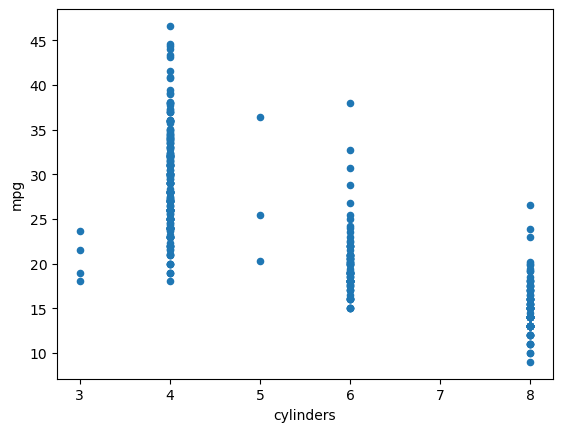

In [403]:
auto_df.plot(kind ='scatter', x= 'cylinders', y = 'mpg')
plt.show()

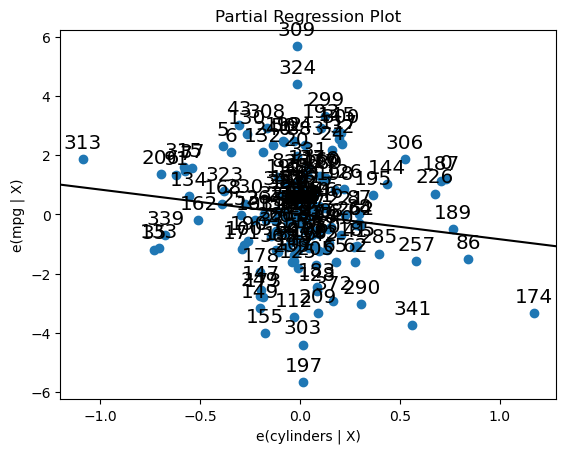

In [38]:
# cylinders, horsepower, acceleration

# cylinders, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["cylinders", "mpg"])))

# 부분 회귀를 사용하여 mpg와 horsepower 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "cylinders", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

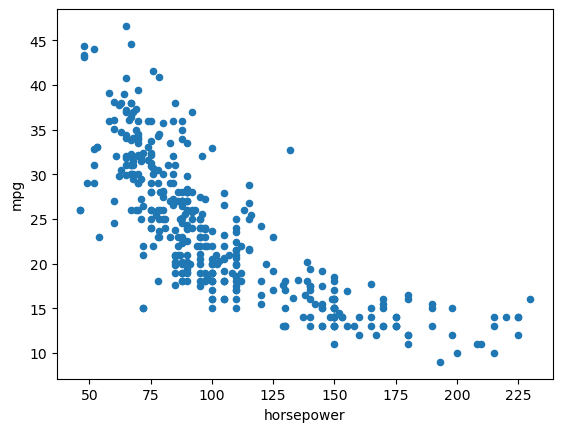

In [401]:
auto_df.plot(kind ='scatter', x= 'horsepower', y = 'mpg')
plt.show()

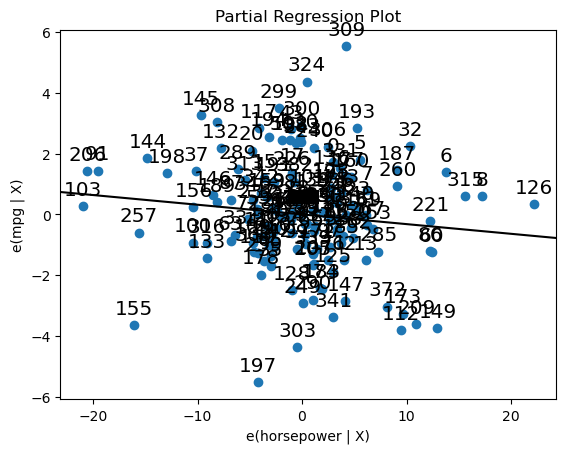

In [41]:
# cylinders, horsepower, acceleration

# horsepower, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["horsepower", "mpg"])))

# 부분 회귀를 사용하여 mpg와 horsepower 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "horsepower", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

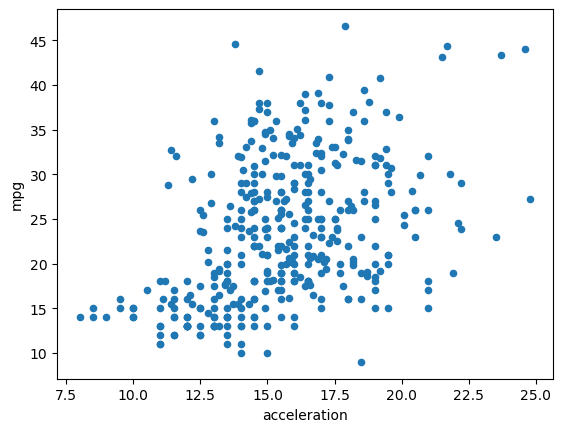

In [47]:
auto_df.plot(kind ='scatter', x= 'acceleration', y = 'mpg')
plt.show()

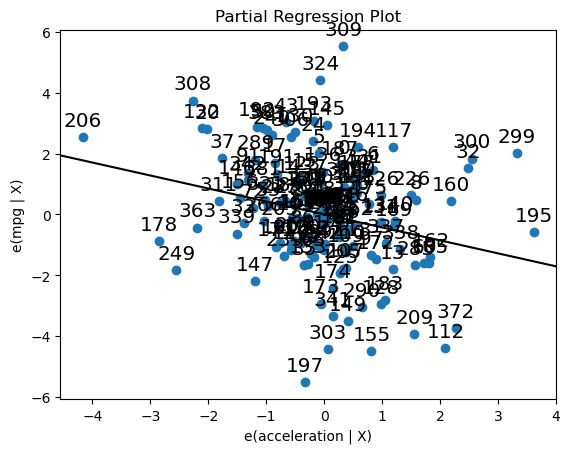

In [45]:
# cylinders, horsepower, acceleration

# acceleration, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["acceleration", "mpg"])))

# 부분 회귀를 사용하여 mpg와 acceleration 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "acceleration", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

### 1-6-2 통계적을 유의한 데이터 : displacement, weight, model_year, origin

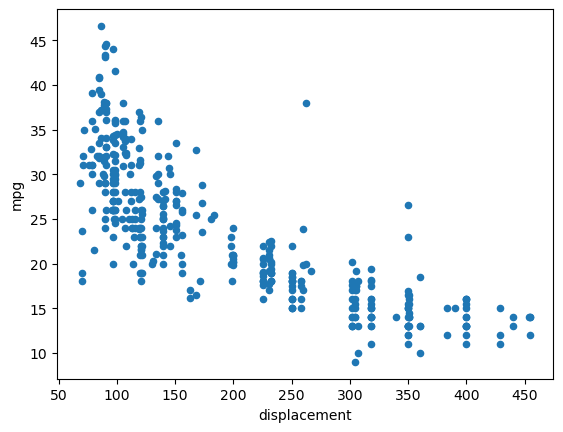

In [387]:
auto_df.plot(kind ='scatter', x= 'displacement', y = 'mpg')
plt.show()

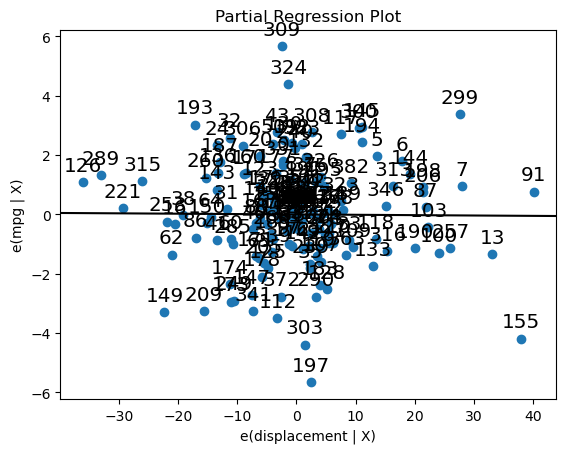

In [367]:
# displacement, weight, model_year, origin

# displacement, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["displacement", "mpg"])))

# 부분 회귀를 사용하여 mpg와 displacement 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "displacement", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

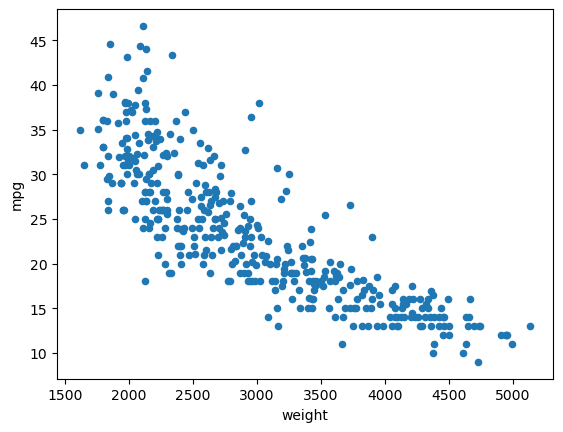

In [389]:
auto_df.plot(kind ='scatter', x= 'weight', y = 'mpg')
plt.show()

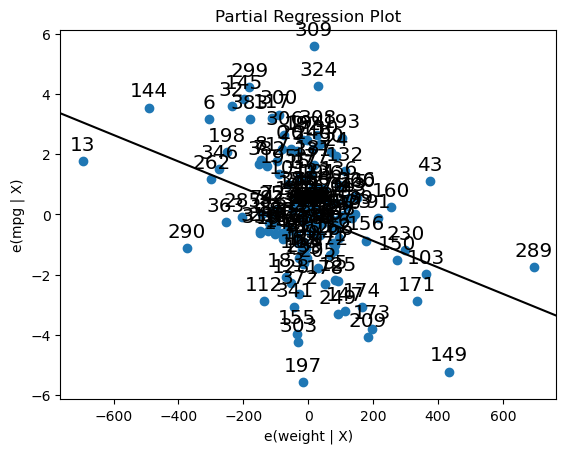

In [369]:
# displacement, weight, model_year, origin

# weight, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["weight", "mpg"])))

# 부분 회귀를 사용하여 mpg와 weight 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "weight", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

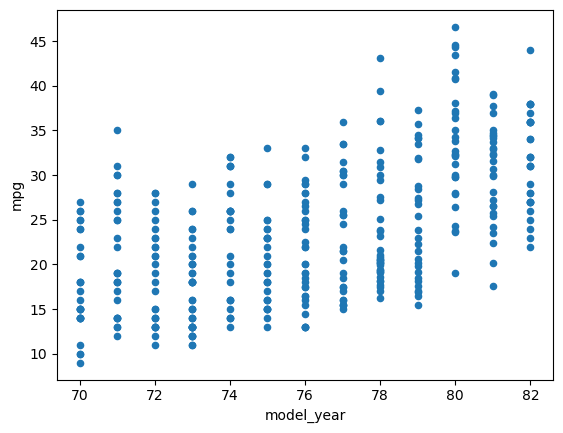

In [393]:
auto_df.plot(kind ='scatter', x= 'model_year', y = 'mpg')
plt.show()

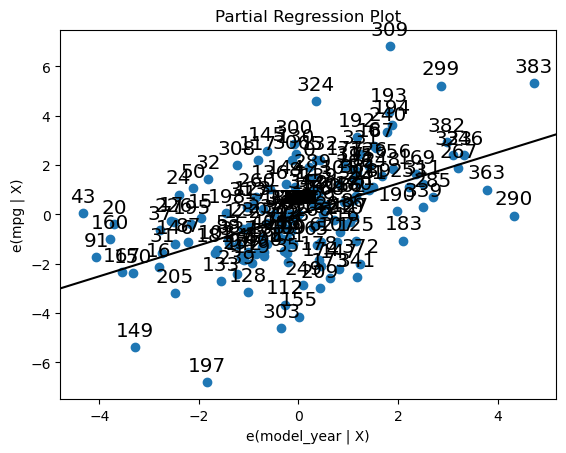

In [371]:
# displacement, weight, model_year, origin

# model_year, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["model_year", "mpg"])))

# 부분 회귀를 사용하여 mpg와 model_year 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "model_year", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

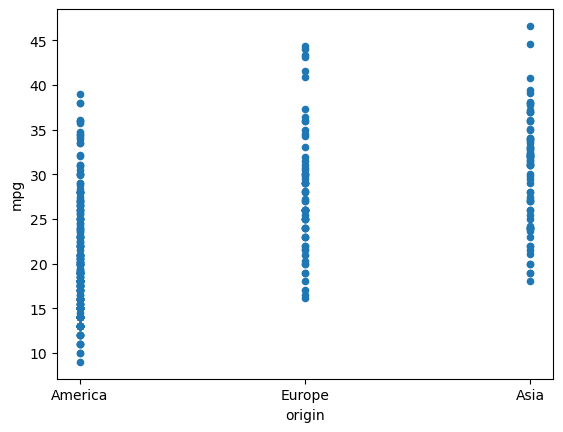

In [399]:
auto_df.plot(kind ='scatter', x= 'origin', y = 'mpg')
plt.xticks([1, 2, 3], ['America', 'Europe', 'Asia'])
plt.show()

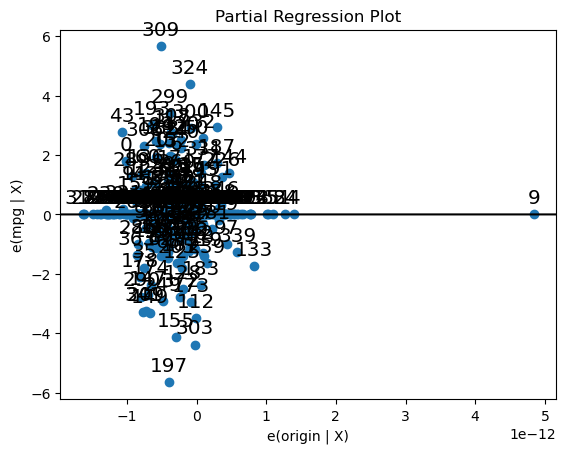

In [373]:
# displacement, weight, model_year, origin

# origin, mpg를 제외한 나머지 독립 변수 이름 추출
others = list(set(auto_df.columns).difference(set(["origin", "mpg"])))

# 부분 회귀를 사용하여 mpg와 origin 간의 관계를 시각화
p, resids = sm.graphics.plot_partregress("mpg", "origin", others, data=auto_df, ret_coords=True)

# 그래프 출력
p.show()

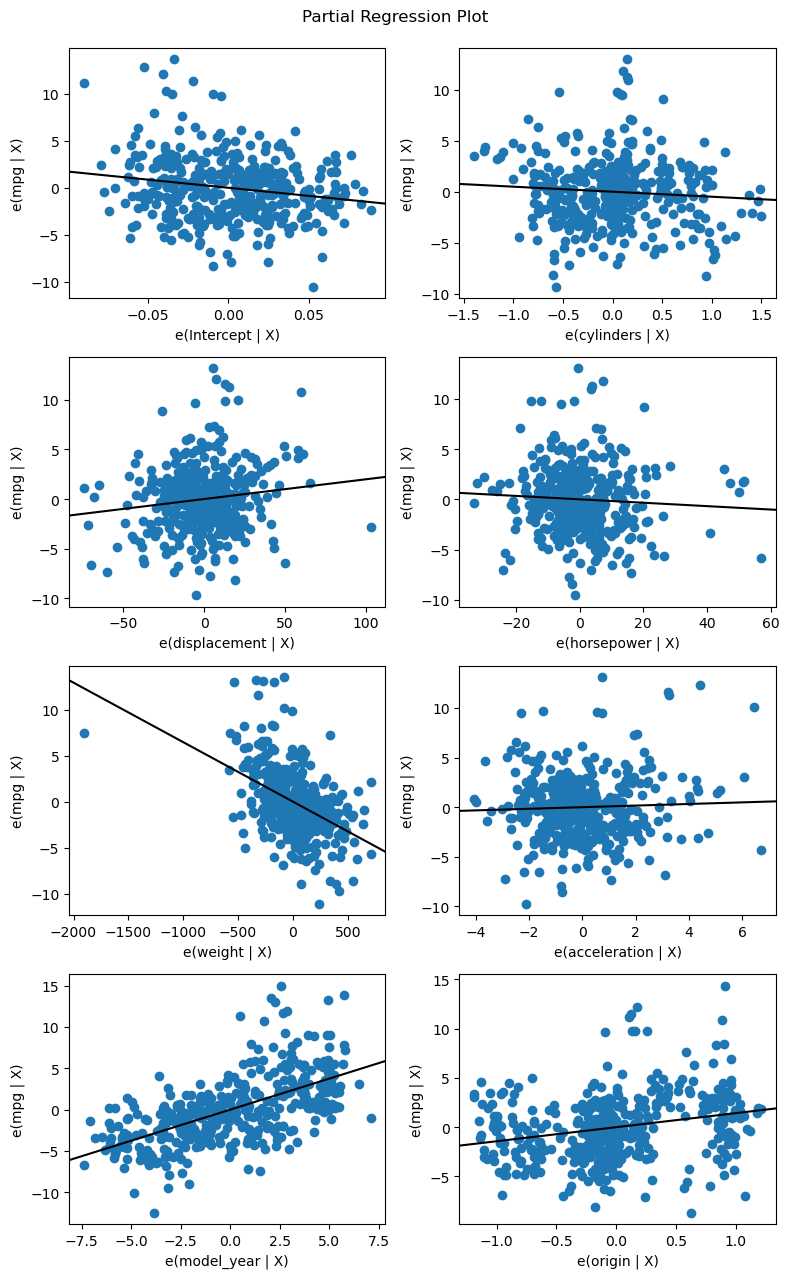

In [375]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

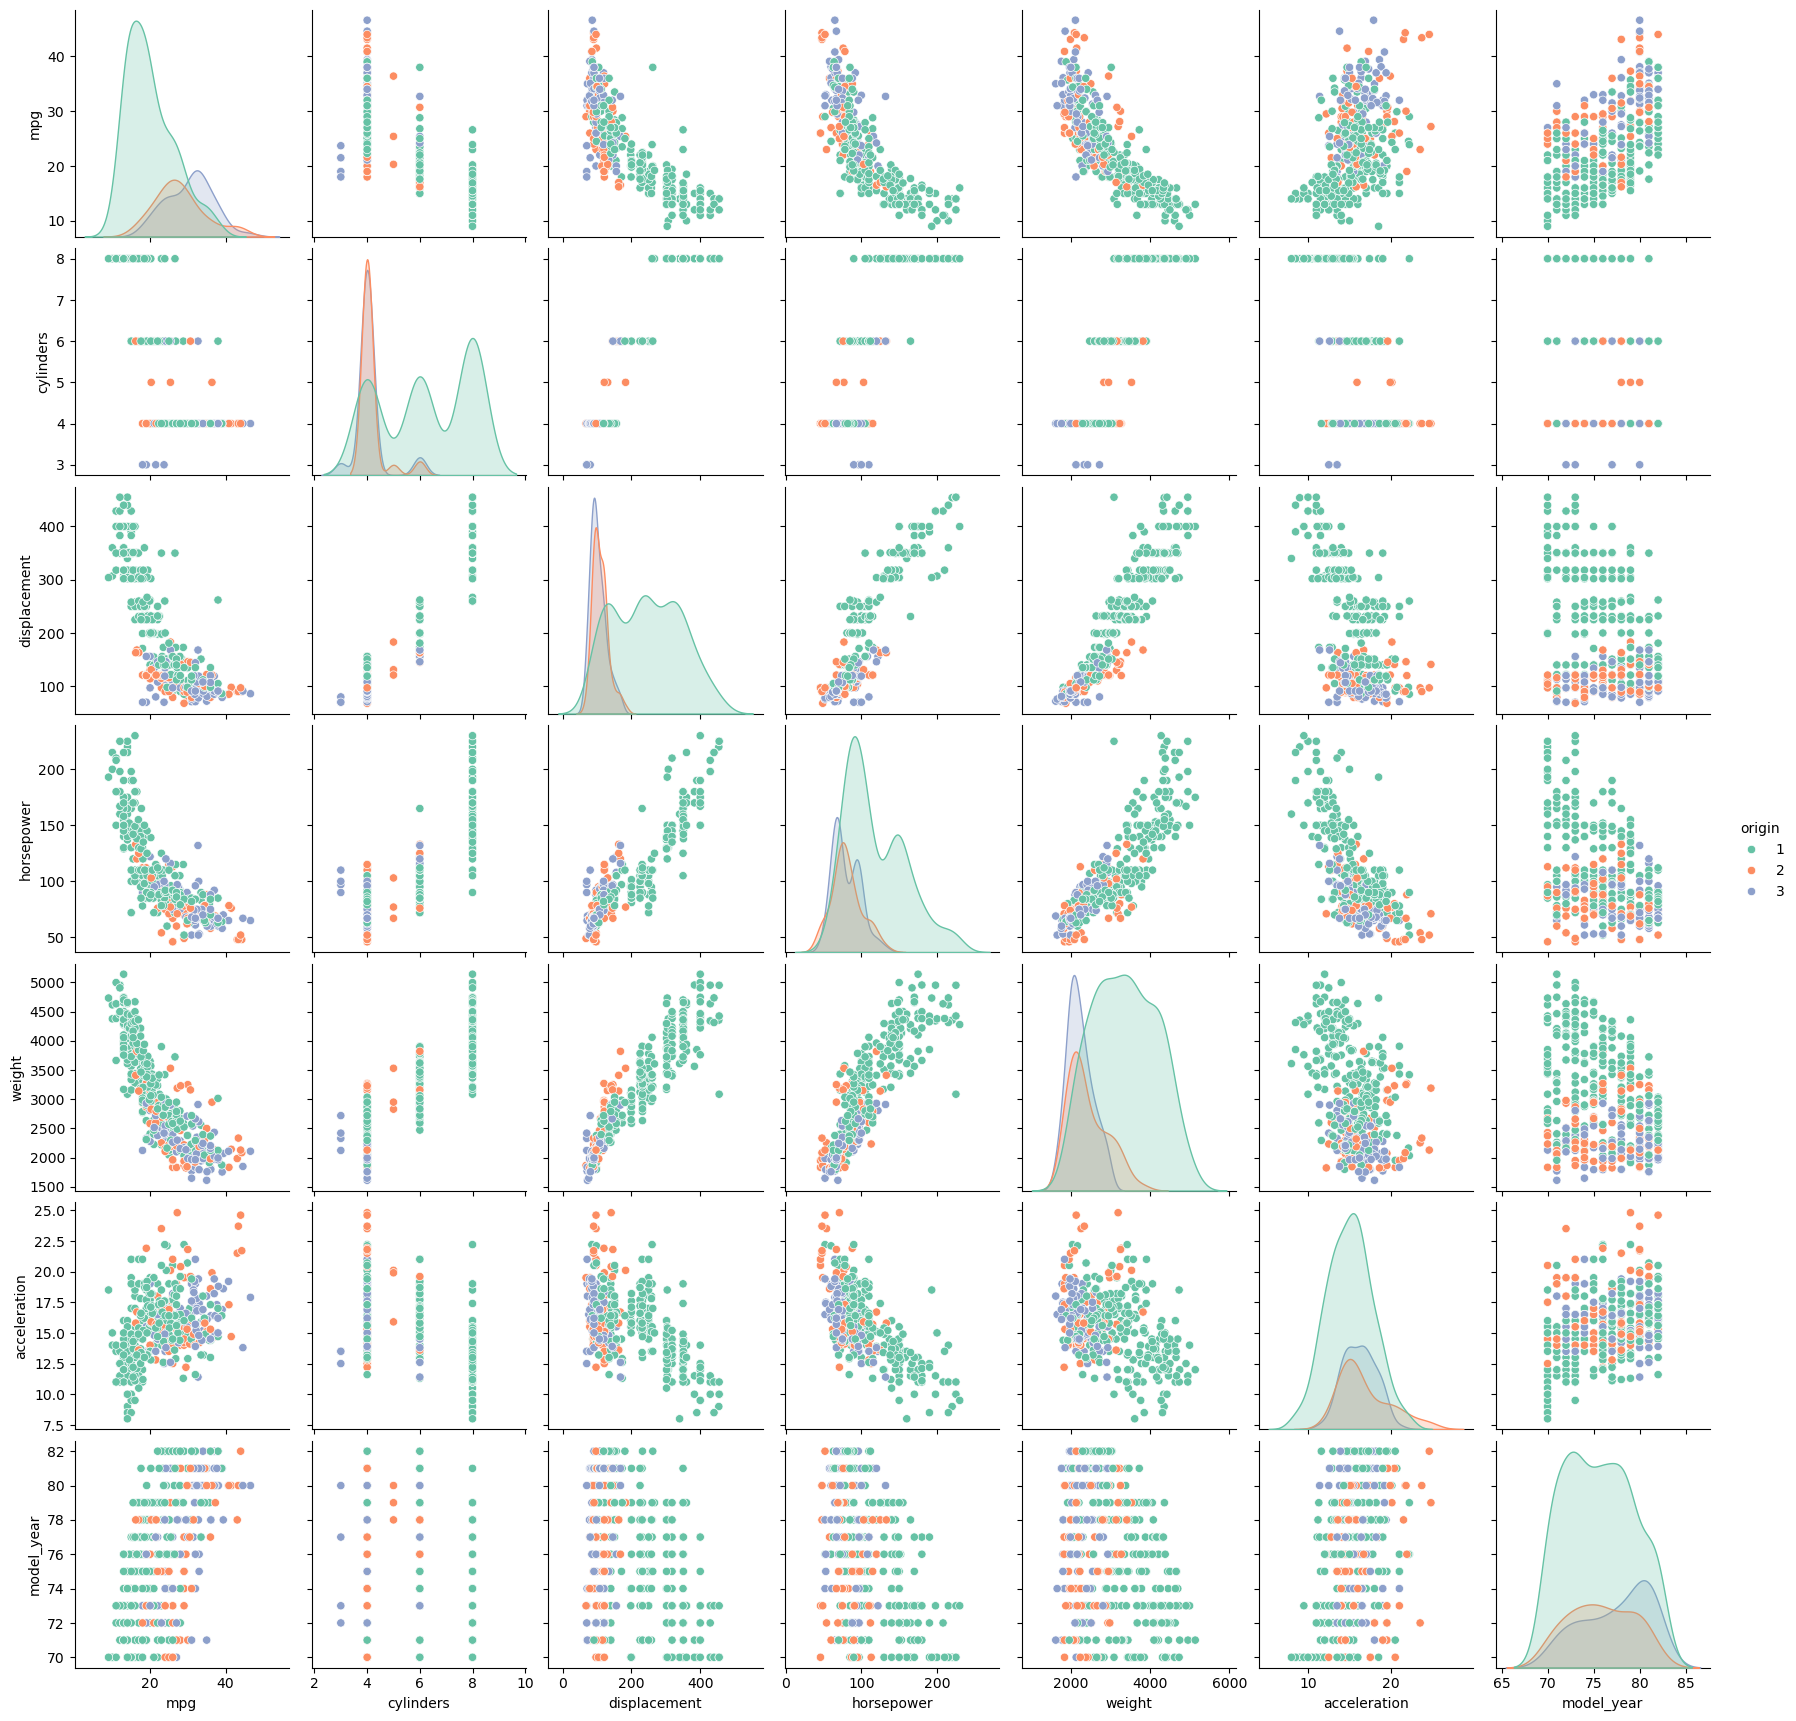

In [379]:
sns.pairplot(auto_df, hue = 'origin', palette='Set2')

plt.show()

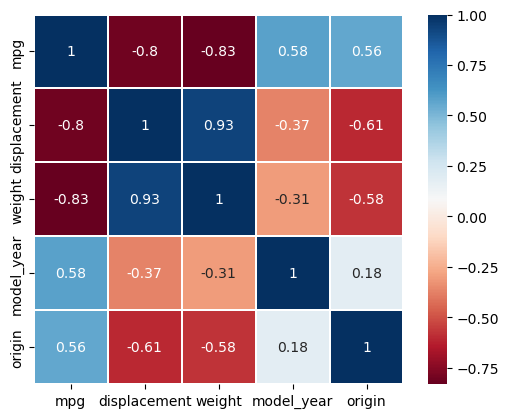

In [383]:
# displacement, weight, model_year, origin

heatmap_data = auto_df[['mpg','displacement', 'weight', 'model_year', 'origin']]

colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = colormap, linecolor = 'white', annot = True,annot_kws = {"size": 10})

plt.show()